<a href="https://colab.research.google.com/github/msremigio/projects_DataScience/blob/master/QuarentenaDados/QuarentenaDados_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Olá, seja bem-vinda e bem-vindo ao notebook da **aula 04!** A partir desta aula iremos analisar e discutir um *sample* da base de dados do **ENEM 2018**. Nessa aula vamos falar sobre diversos temas importantes na área de IA.

#Aula 4

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [ ]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Conheça todas as colunas do nosso dataframe:

In [ ]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [ ]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos, como ficaria muito massivo fazer isso aqui, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [ ]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [ ]:
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [ ]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção?**

Eu tenho mais uma análise das correlações em geral. Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na aula, tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

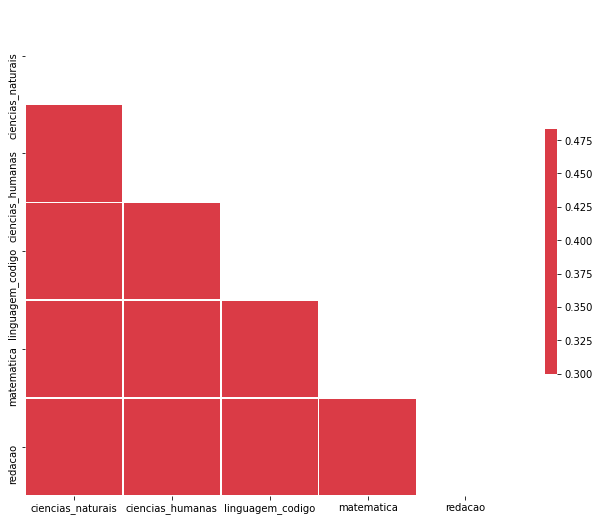

In [ ]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

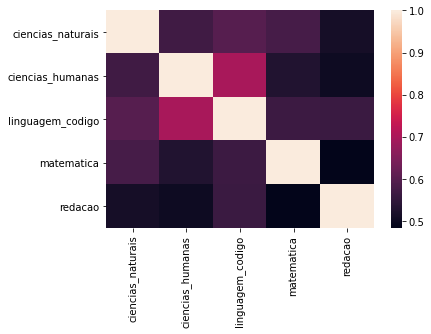

In [ ]:
sns.heatmap(corr)

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

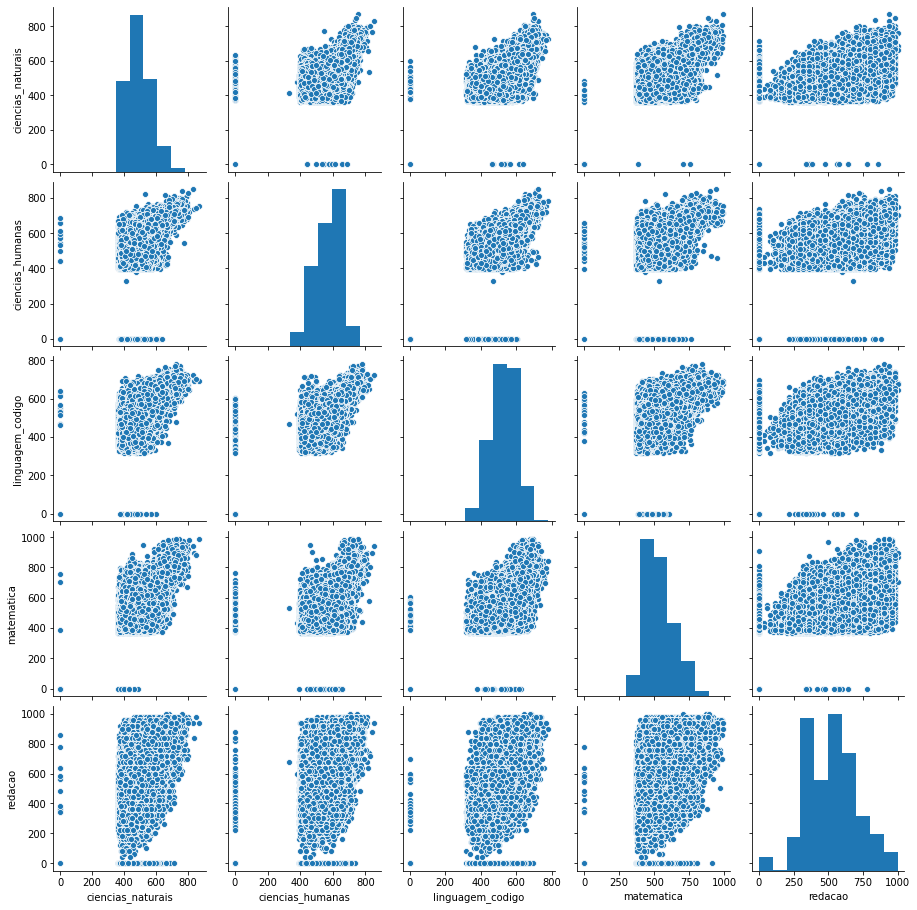

In [ ]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível.

Com isso chegamos ao final de mais uma aula da #quarentenadados

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Até a próxima aula!

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [ ]:
dados_completados = dados.fillna(0)
dados_completados.isnull().sum().sort_values(ascending=False)

Q027               0
IN_LACTANTE        0
IN_AMPLIADA_18     0
IN_AMPLIADA_24     0
IN_BRAILLE         0
                  ..
TX_RESPOSTAS_LC    0
TX_RESPOSTAS_MT    0
TP_LINGUA          0
TX_GABARITO_CN     0
NU_INSCRICAO       0
Length: 137, dtype: int64

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

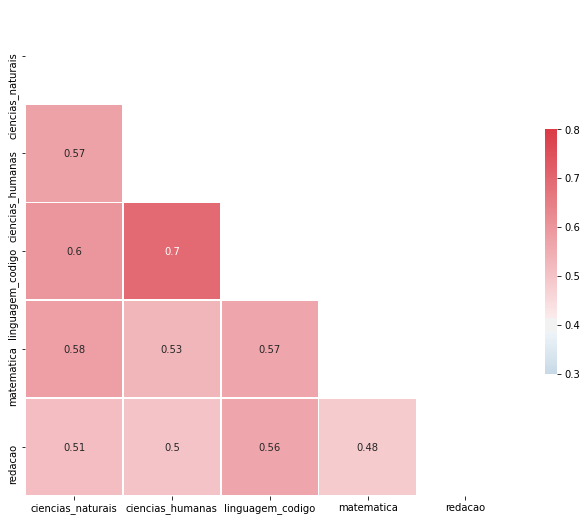

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=0.8, vmin=0.3, center=0.4,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

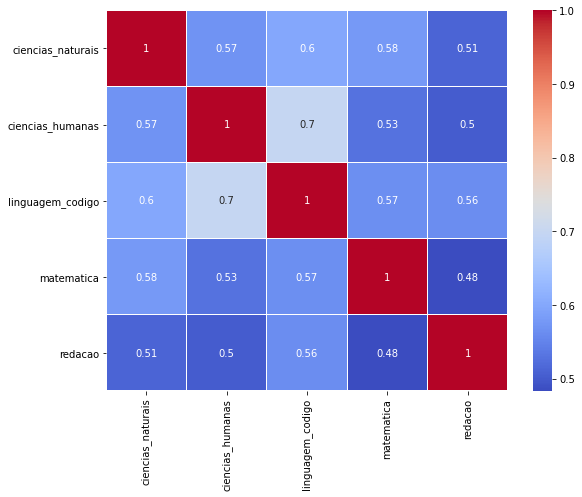

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, linewidths=0.2, cmap='coolwarm');

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [ ]:
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [ ]:
dados_nota_2 = dados.copy()

# dados_nota_2.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'], inplace=True)

dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2.apply(conta_acertos, materia='CN', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2.apply(conta_acertos, materia='CH', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2.apply(conta_acertos, materia='LC', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2.apply(conta_acertos, materia='MT', axis=1)


In [ ]:
dados_nota_2[['TX_RESPOSTAS_CN', 'TX_GABARITO_CN', 'NU_RESPOSTAS_CORRETAS_CN']].head()

,TX_RESPOSTAS_CN,TX_GABARITO_CN,NU_RESPOSTAS_CORRETAS_CN
0,NaN,NaN,0
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,11
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,8
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,7
4,NaN,NaN,0


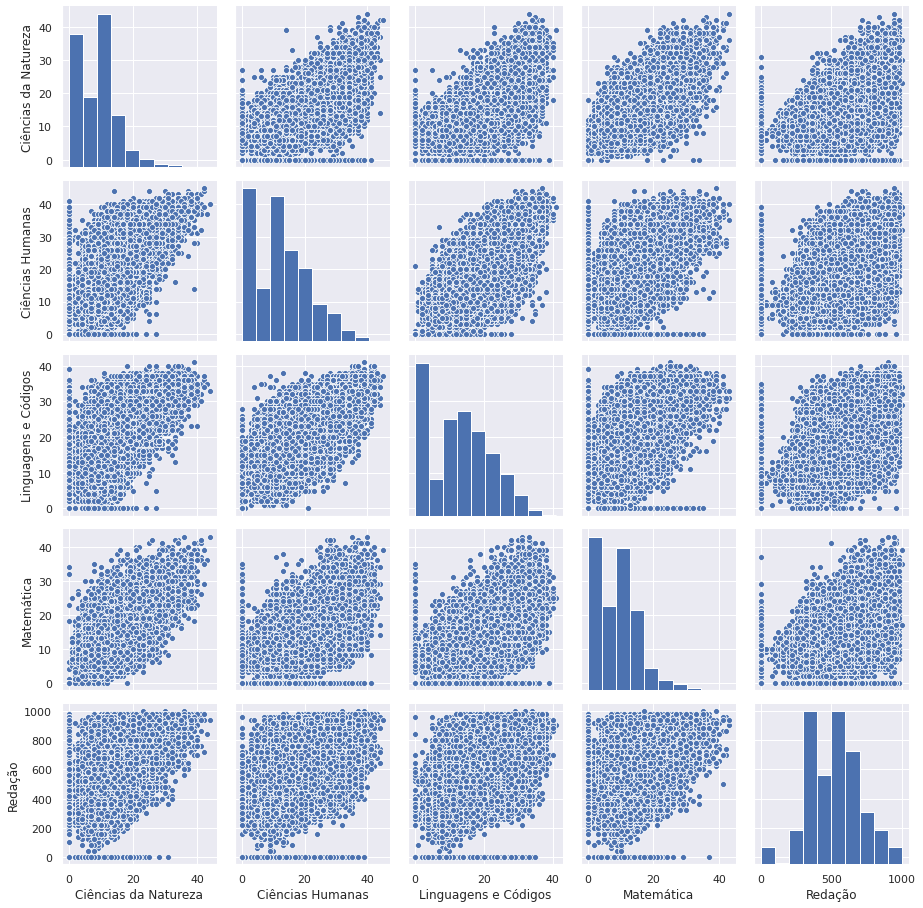

In [ ]:
num_questoes_acertadas = dados_nota_2[['NU_RESPOSTAS_CORRETAS_CN', 'NU_RESPOSTAS_CORRETAS_CH', 'NU_RESPOSTAS_CORRETAS_LC', 'NU_RESPOSTAS_CORRETAS_MT', 'NU_NOTA_REDACAO']]
num_questoes_acertadas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.set()
sns.pairplot(num_questoes_acertadas);

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [ ]:
notas = dados_completados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
notas = notas.replace(0, np.nan)
notas_nao_nulas = notas.dropna()
notas_nao_nulas

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


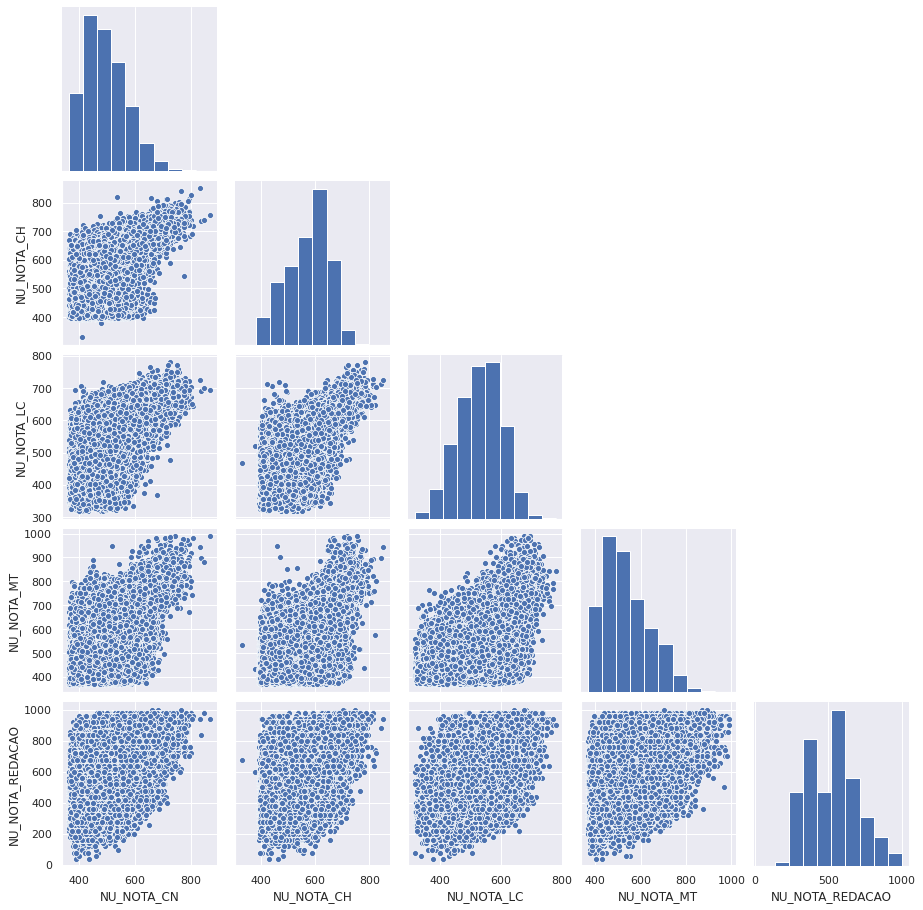

In [ ]:
sns.pairplot(notas_nao_nulas, corner=True);

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [ ]:
cor_resposta_gabarito = dados[['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
                           'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']].dropna()
cor_resposta_gabarito.head()


,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
1,448.00,454.00,457.00,460.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD
2,447.00,451.00,455.00,459.00,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB
3,450.00,453.00,458.00,461.00,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
6,450.00,453.00,458.00,461.00,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
8,449.00,454.00,457.00,462.00,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA


In [ ]:
def corrige_prova(aluno, materia):
  respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
  gabarito = aluno.get(f'TX_GABARITO_{materia}')

  return pd.Series([int(a != b) for a, b in zip(respostas, gabarito)])

prova_azul_CN = cor_resposta_gabarito.query("CO_PROVA_CN == 447")

erros_prova_azul_CN = prova_azul_CN.apply(corrige_prova, materia='CN', axis=1)
erros_prova_azul_CN.columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
                               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
                               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
                               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
                               'Q41', 'Q42', 'Q43', 'Q44', 'Q45']
erros_prova_azul_CN

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
2,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1
10,1,1,0,1,0,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1
12,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1
15,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1
22,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1
137808,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1
137821,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,0,0,1,1,1,1
137834,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0


In [ ]:
erros_por_questao_prova_azul_CN = erros_prova_azul_CN.sum()
erros_por_questao_prova_azul_CN.sort_values(ascending=False)


Q44    21430
Q26    21419
Q14    21153
Q33    20801
Q12    20679
Q20    20598
Q11    20552
Q40    20438
Q45    20292
Q30    20228
Q24    19636
Q22    19462
Q34    19073
Q2     18988
Q13    18878
Q43    18782
Q1     18712
Q38    18570
Q18    18562
Q16    18515
Q5     18481
Q6     18468
Q17    18414
Q15    18163
Q9     18134
Q32    18077
Q4     17940
Q21    17937
Q39    17655
Q35    17575
Q42    17564
Q28    17366
Q31    17208
Q8     17162
Q29    17082
Q37    16947
Q41    16716
Q19    15811
Q3     15354
Q27    14600
Q36    14485
Q25    14393
Q7     12665
Q10    12307
Q23    12199
dtype: int64

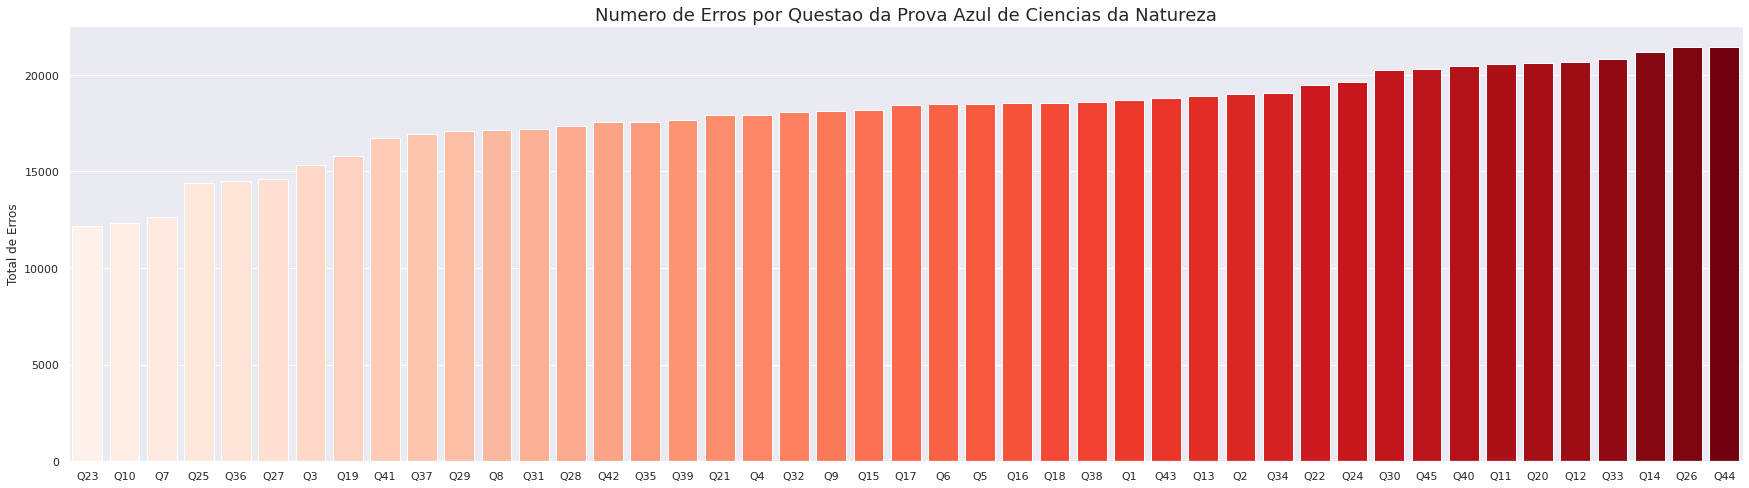

In [ ]:
df_erros = pd.DataFrame(erros_por_questao_prova_azul_CN.sort_values())
df_erros.columns = ['Total de Erros']
#df_erros
plt.figure(figsize=(30,8))

sns.barplot(x = df_erros.index, y = df_erros['Total de Erros'], data = df_erros, palette='Reds', saturation=1)

#plt.xticks(np.arange(0,45),erros_por_questao_prova_azul_CN.index)
plt.title('Numero de Erros por Questao da Prova Azul de Ciencias da Natureza', fontsize=18)

plt.show()

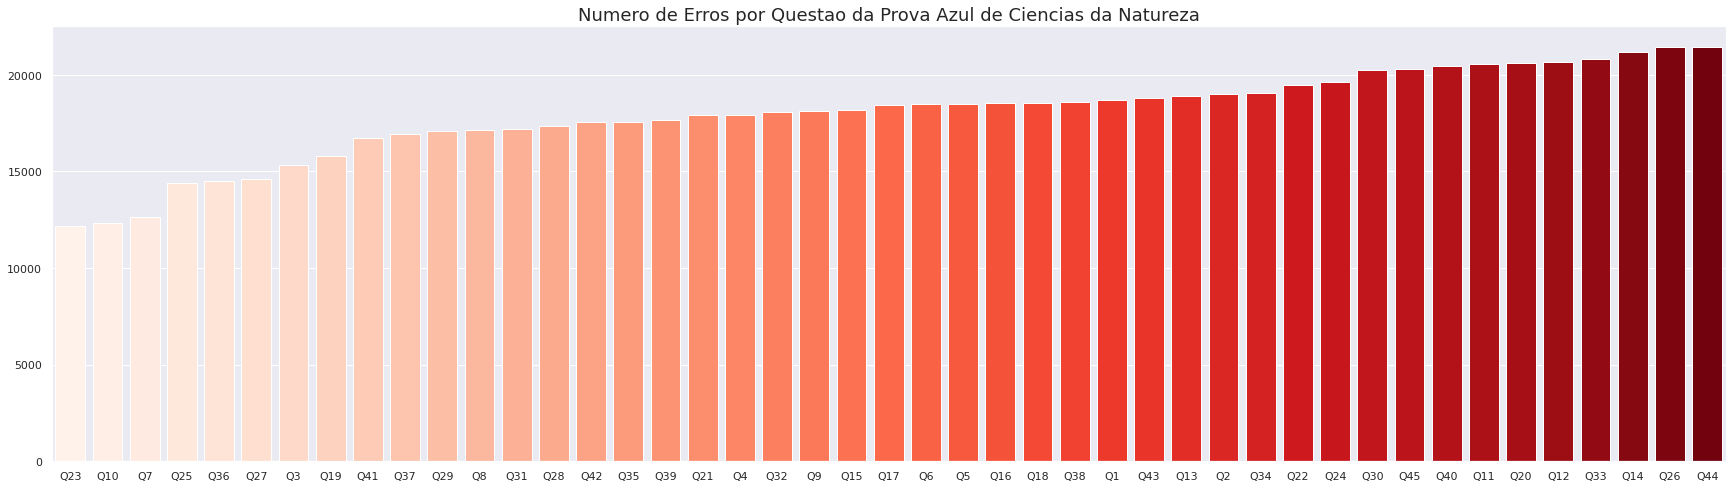

In [ ]:
plt.figure(figsize=(30,8))
x = erros_por_questao_prova_azul_CN.sort_values()

sns.barplot(x = x.index, y = x.values, data = x, palette='Reds', saturation=1)

plt.xticks(np.arange(0,45),x.index)
plt.title('Numero de Erros por Questao da Prova Azul de Ciencias da Natureza', fontsize=18)

plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.